<a href="https://colab.research.google.com/github/IanChoi2464/Machine-Learning-Colab/blob/main/8%203%20Visualization%20of%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 층의 가중치와 특성 맵을 시각화하여 신경망이 이미지에서 어떤 것을 학습하는지 이해한다.
# Keyword
**가중치 시각화**: 합성곱 층의 가중치를 이미지로 출력하는 것, 합성곱 신경망은 주로 이미지를 다루기 때문에 가중치가 시각적인 패턴을 학습하는지 알아볼 수 있음\
**특성 맵 시각화**: 합성곱 층의 활성화 출력을 이미지로 그리는 것, 가중치 시각화와 함꼐 비교하여 각 필터가 이미지의 어느 부분을 활성화시키는지 확인 가능\
**함수형 API**: 케라스에서 신경망 모델을 만드는 방법 중 하나, Model 클래스에 모델의 입력과 출력을 지정, 전형적으로 입력은 Input() 함수를 사용하여 정의하고 출력은 마지막 층의 출력으로 정의
# Function
### **Tensorflow**
**Mpdel**: 케라스 모델을 만드는 클래스\
첫 번째 매개변수인 inputs에 모델의 입력 또는 입력의 리스트를 지정\
두 번째 매개변수인 outputs에 모델의 출력 또는 출력의 리스트를 지정\
name 매개변수에 모델의 이름을 지정 할 수 있음
# Tip
1. 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있다.
2. model._layers[0]은 Sequential 클래스의 InputLayer 객체

In [ ]:
"""가중치 시각화1. 각 층들"""
from tensorflow import keras
model = keras.models.load_model('sample_data/best-cnn-model.h5')
model.layers

(3, 3, 1, 32) (32,)
-0.018049508 0.25455126


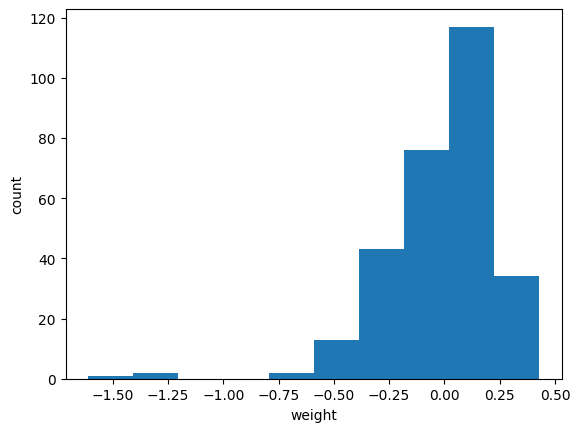

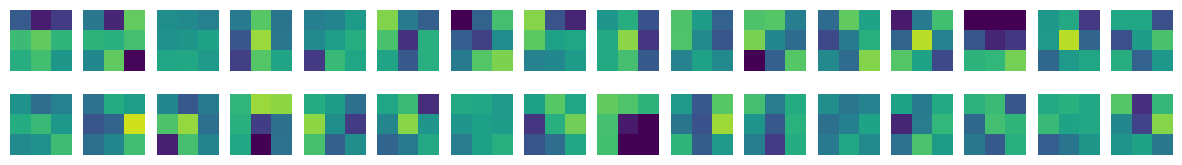

In [ ]:
"""가중치 시각화2. conv 층"""
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

(3, 3, 1, 32) (32,)
-0.008153332 0.08298244


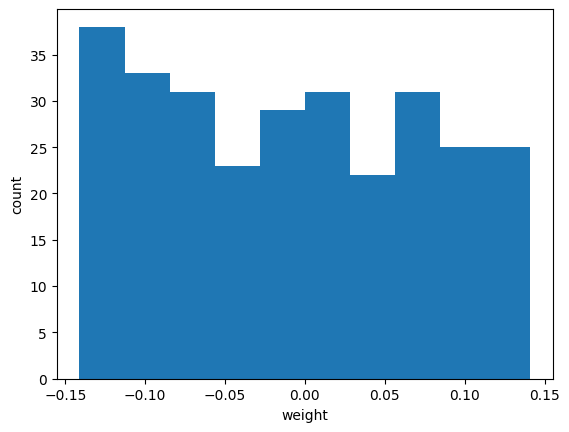

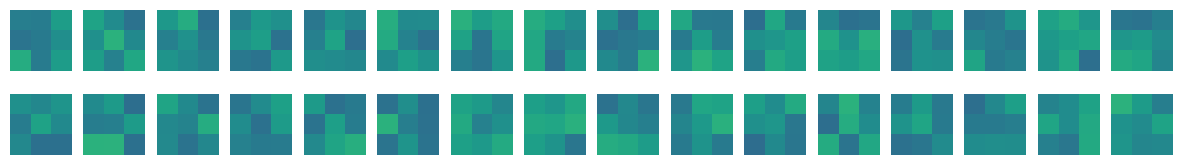

In [ ]:
"""가중치 시각화3. 훈련 하지 않은 모델의 가중치"""
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape, conv.weights[1].shape)
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

import matplotlib.pyplot as plt
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
"""함수형  API"""
print(model.input)

conv_acti = keras.Model(model.input, model.layers[0].output)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


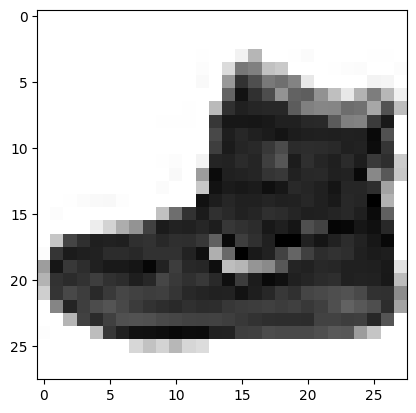

1/1 [==============================] - 0s 204ms/step
(1, 28, 28, 32)


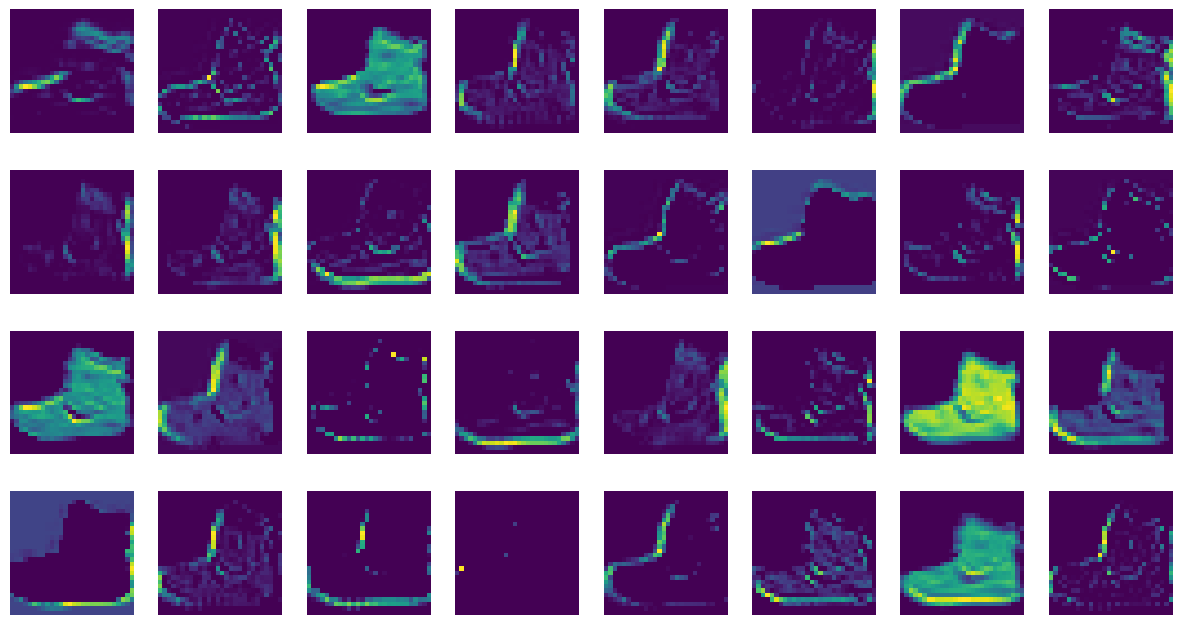

In [ ]:
"""특성 맵 시각화1. 첫 번째 conv 층"""
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()

1/1 [==============================] - 0s 38ms/step
(1, 14, 14, 64)


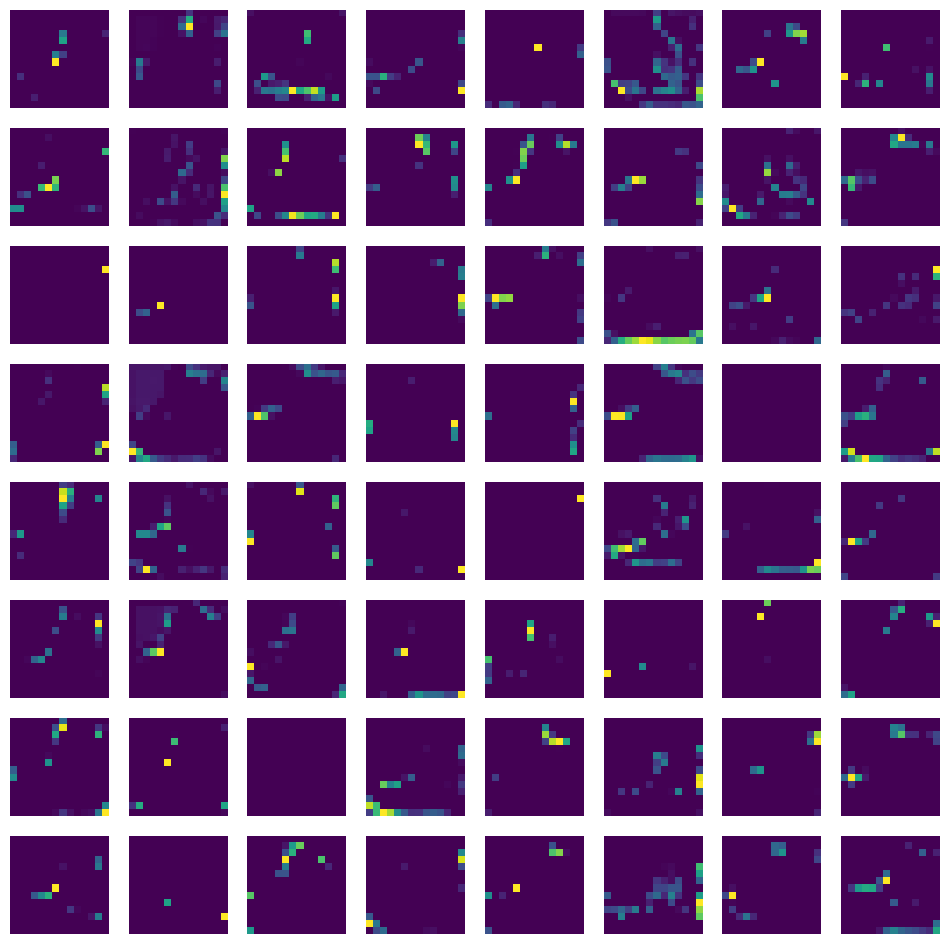

In [ ]:
"""특성 맵 시각화2. 두 번째 conv 층"""
conv2_acti = keras.Model(model.input, model.layers[2].output)
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8 + j])
    axs[i, j].axis('off')

plt.show()